# **BTC Price Predictive Analytics**

Dataset: https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv

# Pendahuluan

Tema dari analisis ini adalah keuangan dimana hasilnya akan berupa model machine learning yang nanti dapat digunakan untuk memprediksi harga dari Bitcoin

# Data Loading
## Import Library

In [1]:
import zipfile, math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from google.colab import files

In [2]:
!pip install -q kaggle

In [3]:
uploaded = files.upload()

Saving kaggle.json to kaggle (5).json


In [4]:
!chmod 600 /content/kaggle.json

In [5]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d sudalairajkumar/cryptocurrencypricehistory

cryptocurrencypricehistory.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
local_zip = '/content/cryptocurrencypricehistory.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
df = pd.read_csv('/content/coin_Bitcoin.csv')
df.sort_values(by=['Date'], inplace=True, ascending=True)
df.set_index('Date', inplace= True)
df

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2013-04-29 23:59:59,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
2013-04-30 23:59:59,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2013-05-01 23:59:59,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
2013-05-02 23:59:59,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
2013-05-03 23:59:59,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...
2021-07-02 23:59:59,2987,Bitcoin,BTC,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2021-07-03 23:59:59,2988,Bitcoin,BTC,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2021-07-04 23:59:59,2989,Bitcoin,BTC,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11


# Exploratory Data Analysis
## Deskripsi Variabel
*   Date : Tanggal pencatatan data
*   Open : harga ketika dibuka yang dihitung perhari
*   Close : harga ketika ditutup yang dihitung perhari
*   Low : harga terendah perhari
*   High : harga tertinggi perhari
*   Volume : volume transaksi perhari
*   Market Cap : Kapitalisasi Pasar berdasarkan USD

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2991 entries, 2013-04-29 23:59:59 to 2021-07-06 23:59:59
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   High       2991 non-null   float64
 4   Low        2991 non-null   float64
 5   Open       2991 non-null   float64
 6   Close      2991 non-null   float64
 7   Volume     2991 non-null   float64
 8   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 233.7+ KB


In [9]:
df.drop(['SNo', 'Name', 'Symbol', 'Volume','Marketcap'],axis=1,inplace=True)
df['OHLC_Average'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4
df

,High,Low,Open,Close,OHLC_Average
Date,,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,140.118000
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,140.994999
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,125.900000
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,109.867973
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,97.806999
...,...,...,...,...,...
2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,33539.229562
2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,34208.731550
2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,35071.847309


In [10]:
df.describe()

,High,Low,Open,Close,OHLC_Average
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000
mean,6893.326038,6486.009539,6700.146240,6711.290443,6697.693065
std,11642.832456,10869.032130,11288.043736,11298.141921,11270.682688
min,74.561096,65.526001,68.504997,68.431000,70.150574
25%,436.179001,422.879486,430.445496,430.569489,430.548504
50%,2387.610107,2178.500000,2269.889893,2286.409912,2285.100037
75%,8733.926948,8289.800459,8569.656494,8576.238715,8533.649752
max,64863.098908,62208.964366,63523.754869,63503.457930,63262.836601


In [11]:
df.head()

,High,Low,Open,Close,OHLC_Average
Date,,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,140.118000
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,140.994999
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,125.900000
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,109.867973
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,97.806999


In [12]:
df['Price_After_Month']=df['Close'].shift(-30)

In [13]:
df.tail()

,High,Low,Open,Close,OHLC_Average,Price_After_Month
Date,,,,,,
2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,33539.229562,NaN
2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,34208.731550,NaN
2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,35071.847309,NaN
2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,34382.088088,NaN
2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,34149.288910,NaN


## Menangani Missing Value dan Outlier

Output kode di atas memberikan informasi statistik pada masing-masing kolom, antara lain:

*   count adalah jumlah sampel pada data.
*   mean adalah nilai rata-rata.
*   std adalah standar deviasi.
*   min yaitu nilai minimum setiap kolom.
*   25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas *   *   interval dalam empat bagian sebaran yang sama.
*   50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
*   75% adalah kuartil ketiga.
*   Max adalah nilai maksimum

In [14]:
df.isnull().sum()
#df.isna().sum()

High                  0
Low                   0
Open                  0
Close                 0
OHLC_Average          0
Price_After_Month    30
dtype: int64

Dari hasil prediksi diatas, tidak terdapat Missing Value pada setiap variabel

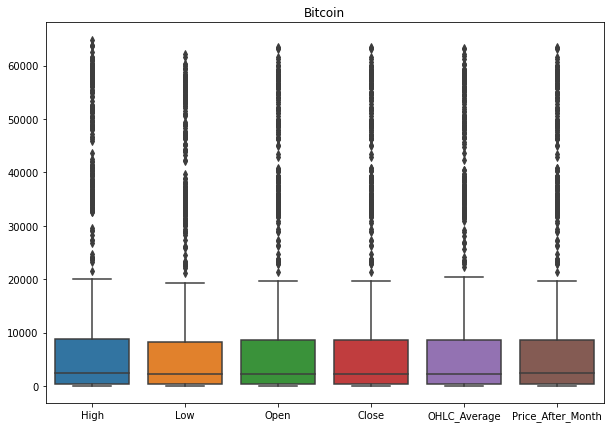

In [15]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=df).set_title("Bitcoin")
plt.show()

Jika dilihat dari plot diatas terdapat banyak sekali Outlier pada setiap variabel yang dipilih

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

df.shape

(2758, 6)

Untuk mengatasi Outlier diatas maka memerlukan penentuan batas atas dan bawah nilai quartil pada data

## Univariate Analysis

Karena tidak terdapat Categorical Features, maka kita dapat langsung menganalisis Numerical Features pada dataset dengan menampilkan plot dan grafik histogramnya

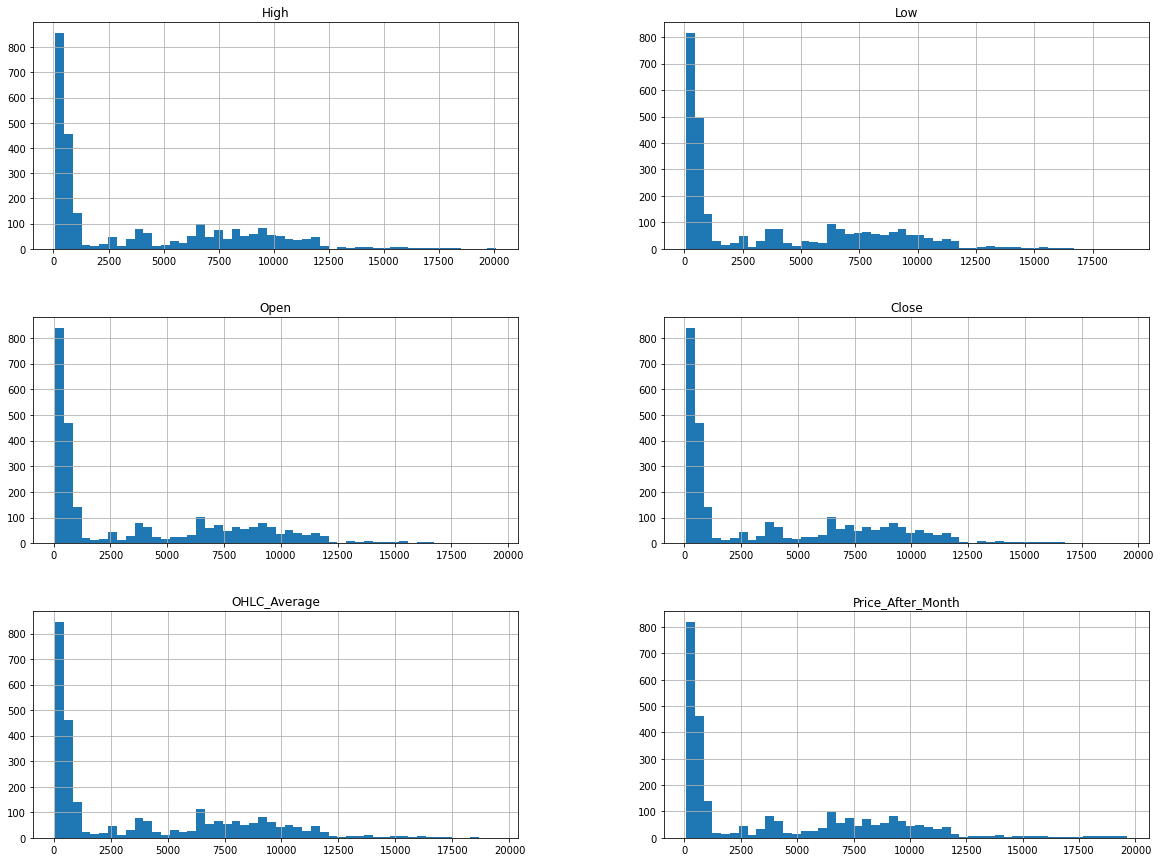

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Dari hasil histogram diatas dapat disimpulkan bahwasannya hampir semua variabel Distribusi nilainya miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model nantinya.

## Multivariate Analysis

Karena tidak terdapat Categorical Features, maka kita dapat langsung menganalisis Numerical Features pada dataset dengan menampilkan plot dan grafik relasinya

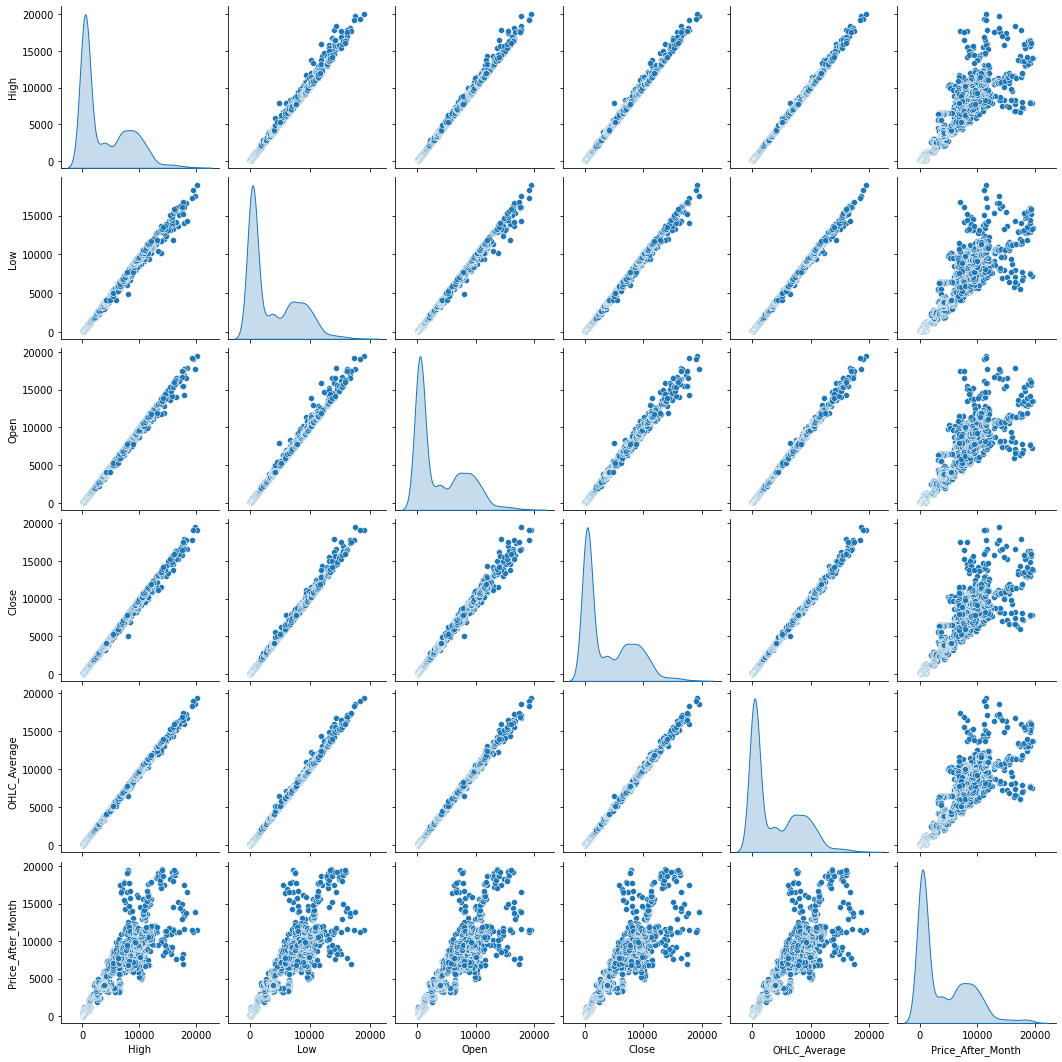

In [18]:
sns.pairplot(df, diag_kind = 'kde')

Korelasi yang terjadi kebanyakan bernilai positif karena kebanyakan grafik pada sumbu y dan x mengalami peningkatan yang cukup signifikan membentuk sebuah garis

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

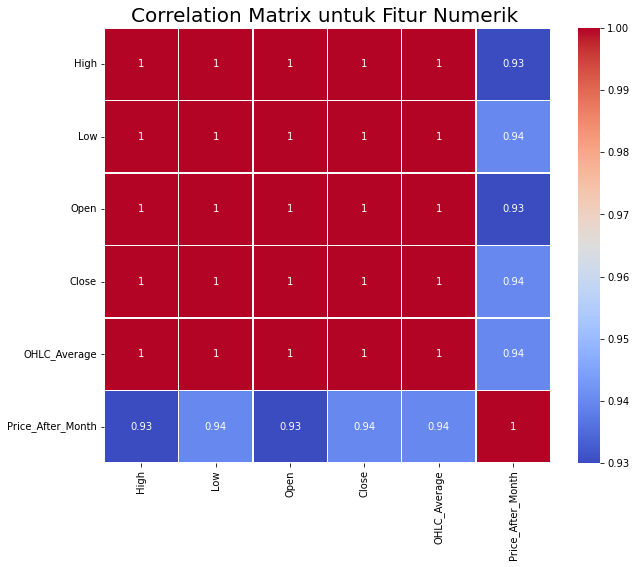

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

terlihat bahwa pada matriks korelasi diatas dapat disimpulkan bahwasannya semua variabel memiliki keterikatan dan korelasi yang kuat antar variabel lainnya, dimana nilai korelasi antar variabel bernilai lebih dari 0.9 atau mendekati 1.

## Data Preparation

### Train Test Split


In [20]:
df.dropna(inplace=True)
X = df.drop('Price_After_Month',axis=1)

X = preprocessing.scale(X)
y = df['Price_After_Month']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [22]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2758
Total # of sample in train dataset: 2206
Total # of sample in test dataset: 552


### Standarisasi

Melakukan Standarisasi pada data Training dan Testing

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Development

In [24]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### K-Nearest Neighbor

In [25]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

### Random Forest

In [26]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### Boosting Algorithm

In [27]:
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluasi Model

### Mengukur seberapa kecil nilai error MSE

In [28]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,1496.36,2135.59
RF,335.81,2367.42
Boosting,2037.43,2351.2


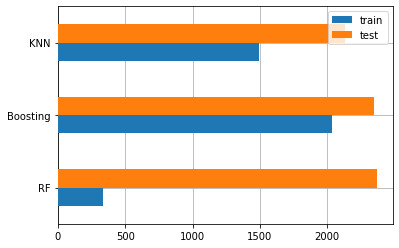

In [29]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model KNN memberikan nilai eror yang paling kecil. Model inilah yang dapat digunakan sebagai model terbaik untuk melakukan prediksi harga Bitcoin.

### Menghitung nilai akurasi model

In [30]:
knn_accuracy = knn.score(X_test, y_test)*100
rf_accuracy = RF.score(X_test, y_test)*100
boosting_accuracy = boosting.score(X_test, y_test)*100

In [31]:
list_evaluasi = [[knn_accuracy],
            [rf_accuracy],
            [boosting_accuracy]]
evaluasi = pd.DataFrame(list_evaluasi,
                        columns=['Accuracy (%)'],
                        index=['K-Nearest Neighbor', 'Random Forest', 'Boosting'])
evaluasi

,Accuracy (%)
K-Nearest Neighbor,89.164207
Random Forest,87.987936
Boosting,88.070238


Dari hasil evaluasi di atas dapat memberikan informasi bahwa ketiga model yang dibangun memiliki performa di atas 80%. Dimana dapat dilihat juga bahwa model dengan algoritma KNN memiliki performa yang diukur dengan nilai akurasi yang lebih baik dari dua model lainnya yaitu model dengan algoritma Random Forest dan Boosting.

In [32]:
X_30=X[-30:]
forecast=knn.predict(X_30)

In [33]:
df1=pd.DataFrame(forecast,columns=['Forecast'])
df1=df.append(df1)
df1.drop(['High', 'Low', 'Open'],axis=1,inplace=True)

In [34]:
df1.tail(35)

,Close,OHLC_Average,Price_After_Month,Forecast
2020-11-11 23:59:59,15701.339732,15549.629038,18058.903347,NaN
2020-11-12 23:59:59,16276.343949,15954.354762,18803.656870,NaN
2020-11-13 23:59:59,16317.808190,16262.394827,19142.382534,NaN
2020-11-14 23:59:59,16068.138707,16113.237090,19246.644341,NaN
2020-11-15 23:59:59,15955.587439,15985.092951,19417.076033,NaN
0,NaN,NaN,NaN,13439.780185
1,NaN,NaN,NaN,12005.756376
2,NaN,NaN,NaN,11654.482282
3,NaN,NaN,NaN,11126.000694
4,NaN,NaN,NaN,14862.964443


Berikut adalah nilai prediksi 30 hari kedepan yang didapat dari metode terbaik yaitu KNN yang dievaluasikan sebelumnya

## Penutup

Model untuk memprediksi harga bitcoin telah selesai dibuat dan dari hasil pengujian, ketiga model yang dibuat memiliki performa yang baik dan dapat digunakan untuk memprediksi data sebenarnya hanya saja model terbaik ialah model KNN karena KNN memiliki nilai akurasi yang tinggi dibandingkan dengan model lain.